# Data Exploration

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib as mpl

In [34]:
# Baca dataset dari csv
data = pd.read_csv('used_cars.csv')

### Correlation Data

Text(0.5, 1, 'Correlation Data')

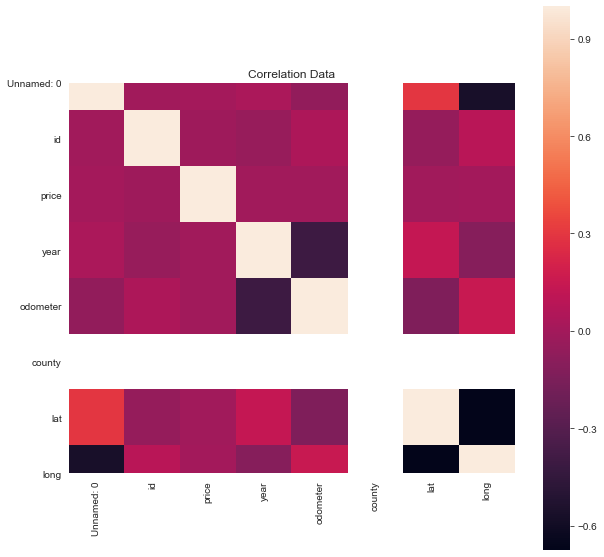

In [35]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Data") #semakin ke atas (putih) korelasi data semakin kuat

### Pemotongan Data untuk Classification

In [36]:
classi_data = data[['price','year','manufacturer','model','condition','odometer','transmission','lat','long']]
classi_data

,price,year,manufacturer,model,condition,odometer,transmission,lat,long
0,17899,2012.0,volkswagen,golf r,excellent,63500.0,manual,40.7372,-111.858
1,0,2016.0,ford,f-150,excellent,10.0,automatic,40.5881,-111.884
2,46463,2015.0,gmc,sierra 1500,excellent,7554.0,automatic,40.5881,-111.884
3,0,2016.0,ford,f-150,excellent,10.0,automatic,40.5881,-111.884
4,49999,2018.0,ford,f-450,NaN,70150.0,automatic,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...
19996,49999,2016.0,ram,cummin 2500 laramie,NaN,43406.0,automatic,46.2348,-119.128
19997,12127,2018.0,nissan,sentra,NaN,32867.0,automatic,46.5642,-120.496
19998,0,2019.0,jeep,grand cherokee limited,NaN,17514.0,automatic,46.0783,-118.293
19999,14661,2017.0,toyota,corolla,NaN,30486.0,automatic,46.5642,-120.496


In [37]:
classi_data.describe()

,price,year,odometer,lat,long
count,2.000100e+04,19989.000000,1.761200e+04,18970.000000,18970.000000
mean,7.664058e+04,2009.830657,9.916435e+04,40.394737,-86.300395
std,8.335762e+06,7.913613,7.963487e+04,4.440290,18.219242
min,0.000000e+00,1917.000000,0.000000e+00,-51.812200,-155.901000
25%,3.970000e+03,2007.000000,5.013300e+04,37.273700,-80.166800
50%,8.795000e+03,2011.000000,9.389900e+04,38.258600,-77.514200
75%,1.749500e+04,2015.000000,1.339090e+05,44.439500,-76.238400
max,1.172420e+09,2020.000000,2.500005e+06,59.746600,9.095700


In [38]:
classi_data.head()

,price,year,manufacturer,model,condition,odometer,transmission,lat,long
0,17899,2012.0,volkswagen,golf r,excellent,63500.0,manual,40.7372,-111.858
1,0,2016.0,ford,f-150,excellent,10.0,automatic,40.5881,-111.884
2,46463,2015.0,gmc,sierra 1500,excellent,7554.0,automatic,40.5881,-111.884
3,0,2016.0,ford,f-150,excellent,10.0,automatic,40.5881,-111.884
4,49999,2018.0,ford,f-450,NaN,70150.0,automatic,40.3744,-104.694


In [39]:
# Simpan dataset ke csv
classi_data.to_csv("classification_dataset.csv", index=False)

### Cek data apakah seimbang atau tidak

In [40]:
classi_data.groupby("condition").count()

,price,year,manufacturer,model,odometer,transmission,lat,long
condition,,,,,,,,
excellent,5618,5618,5462,5537,5059,5618,5493,5493
fair,367,367,342,359,283,367,366,366
good,4139,4139,3967,4098,3756,4139,4102,4102
like new,672,672,632,664,572,672,663,663
new,26,26,22,25,22,26,26,26
salvage,27,27,26,27,22,27,27,27


In [41]:
# Membuat label
def make_label(condition):
    if condition == "excellent":
        return 1
    else:
        return 0
classi_data['hasilnya'] = classi_data['condition'].apply(make_label)
classi_data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,price,year,manufacturer,model,condition,odometer,transmission,lat,long,hasilnya
0,17899,2012.0,volkswagen,golf r,excellent,63500.0,manual,40.7372,-111.858,1
1,0,2016.0,ford,f-150,excellent,10.0,automatic,40.5881,-111.884,1
2,46463,2015.0,gmc,sierra 1500,excellent,7554.0,automatic,40.5881,-111.884,1
3,0,2016.0,ford,f-150,excellent,10.0,automatic,40.5881,-111.884,1
4,49999,2018.0,ford,f-450,NaN,70150.0,automatic,40.3744,-104.694,0
...,...,...,...,...,...,...,...,...,...,...
19996,49999,2016.0,ram,cummin 2500 laramie,NaN,43406.0,automatic,46.2348,-119.128,0
19997,12127,2018.0,nissan,sentra,NaN,32867.0,automatic,46.5642,-120.496,0
19998,0,2019.0,jeep,grand cherokee limited,NaN,17514.0,automatic,46.0783,-118.293,0
19999,14661,2017.0,toyota,corolla,NaN,30486.0,automatic,46.5642,-120.496,0


### Cek missing values

In [42]:
missing_values = classi_data.isnull().sum()
missing_values

price              0
year              12
manufacturer     705
model            265
condition       9152
odometer        2389
transmission     190
lat             1031
long            1031
hasilnya           0
dtype: int64

### Isi data yang terdapat NaN

In [43]:
classi_data['price'].fillna('-', inplace=True)
classi_data = classi_data.fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Cek data yang telah diisi (tidak ada NaN)

In [44]:
missing_values = classi_data.isnull().sum()
missing_values

price           0
year            0
manufacturer    0
model           0
condition       0
odometer        0
transmission    0
lat             0
long            0
hasilnya        0
dtype: int64

### Cek outlier pada data

<Figure size 6000x6000 with 0 Axes>

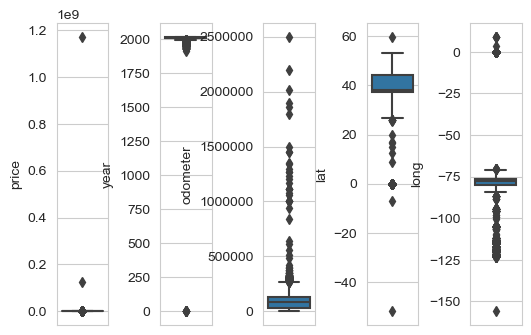

In [45]:
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 5)
sns.boxplot(y=classi_data["price"], ax=axes[0])
sns.boxplot(y=classi_data["year"], ax=axes[1])
sns.boxplot(y=classi_data["odometer"], ax=axes[2])
sns.boxplot(y=classi_data["lat"], ax=axes[3])
sns.boxplot(y=classi_data["long"], ax=axes[4])
plt.subplots_adjust(wspace=1)

### Visualisasi dari Data Exploration

<Figure size 5000x5000 with 0 Axes>

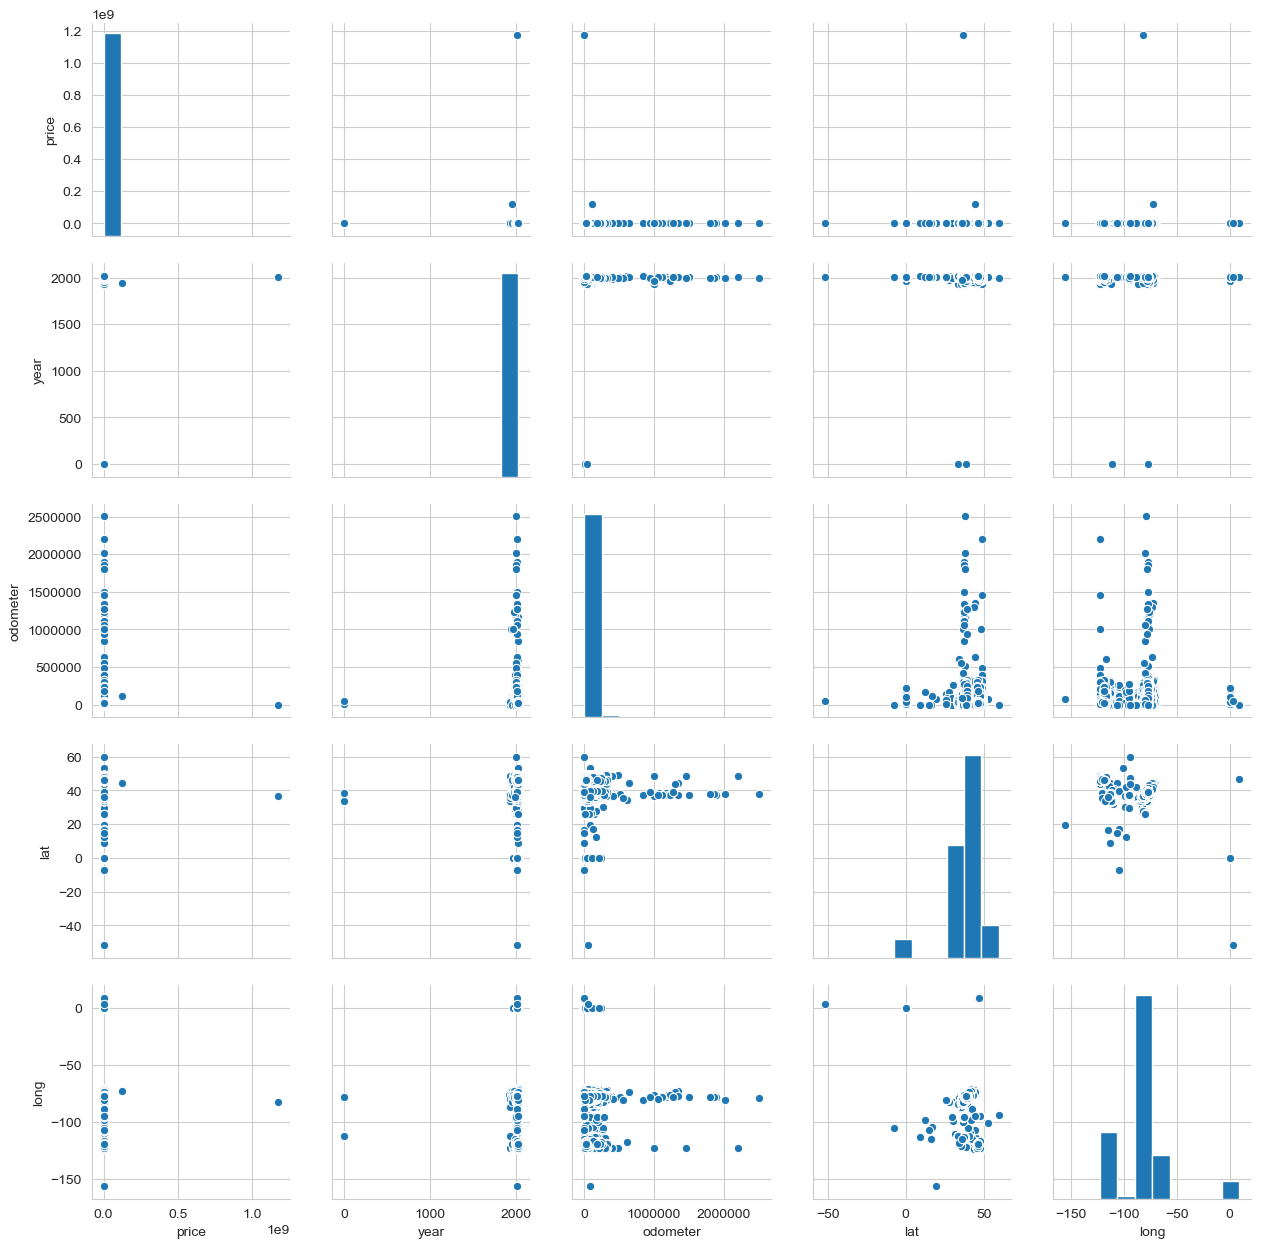

In [46]:
mpl.rcParams['figure.dpi'] = 100
plt.figure(figsize=(50, 50))
df_nona= classi_data[classi_data['year'].notnull()]
g = sns.pairplot(df_nona[['price','year','odometer','lat','long']] )

In [47]:
# data_train = np.array([data['price'],data['year'],data['odometer'],data['lat'],data['long']])
data_train = []
data_train

[]

### Data Independen = Data Train

In [48]:
for item in classi_data.values:
#     print(item[1])
    data_train.append([item[0], item[1]])
data_train

[[17899, 2012.0],
 [0, 2016.0],
 [46463, 2015.0],
 [0, 2016.0],
 [49999, 2018.0],
 [13999, 2009.0],
 [34500, 2017.0],
 [14500, 2007.0],
 [12500, 2013.0],
 [34500, 2012.0],
 [5900, 1994.0],
 [16500, 2013.0],
 [14500, 2007.0],
 [27999, 2015.0],
 [14999, 2004.0],
 [24999, 2014.0],
 [35500, 2015.0],
 [8999, 2002.0],
 [5999, 2003.0],
 [63500, 2019.0],
 [13500, 2010.0],
 [31895, 2008.0],
 [9500, 2001.0],
 [57995, 0.0],
 [4600, 2008.0],
 [32995, 2014.0],
 [39995, 0.0],
 [26950, 2015.0],
 [39995, 2016.0],
 [8300, 2016.0],
 [30000, 1992.0],
 [43995, 0.0],
 [37995, 2017.0],
 [43995, 0.0],
 [59995, 0.0],
 [27476, 2015.0],
 [23500, 2011.0],
 [15475, 2016.0],
 [15475, 2018.0],
 [3995, 1999.0],
 [34900, 2015.0],
 [21475, 2018.0],
 [14476, 2017.0],
 [23295, 2013.0],
 [0, 2016.0],
 [0, 2016.0],
 [28248, 2014.0],
 [23800, 2010.0],
 [28000, 2004.0],
 [15995, 2014.0],
 [10550, 2014.0],
 [37995, 2017.0],
 [18999, 2015.0],
 [79997, 2016.0],
 [18999, 2013.0],
 [44995, 0.0],
 [33950, 1935.0],
 [2500, 2004.0]

In [49]:
train = np.array(data_train)
len(train)

20001

### Dependen Data = Data Label

In [50]:
label = np.array(classi_data['hasilnya'])
len(label)

20001

In [51]:
# Split dataset 80% dan 20% secara random
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size = 0.2, random_state = 100)

## KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
error_rate = []
for i in range(1,51):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

### Visualisasi dari KNN

Text(0, 0.5, 'Error Rate')

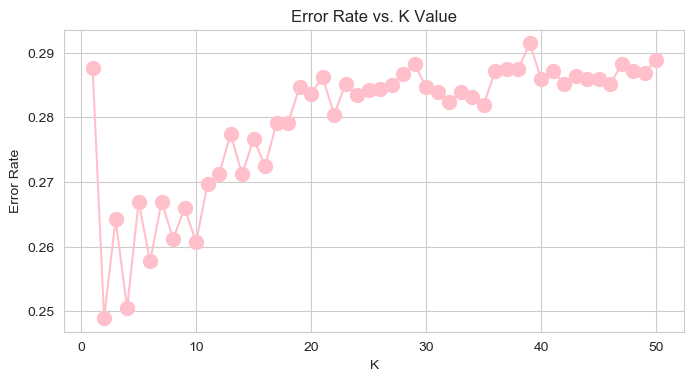

In [54]:
plt.figure(figsize=(8,4))
plt.plot(range(1,51),error_rate,color='pink', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [56]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

In [57]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluasi (Akurasi & Confusion matrix)

In [58]:
# Hasil akurasi dari metode KNN
from sklearn.metrics import classification_report
hasil = classifier.predict(x_test)
print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2863
           1       0.54      0.41      0.47      1138

    accuracy                           0.73      4001
   macro avg       0.66      0.64      0.65      4001
weighted avg       0.72      0.73      0.72      4001



### Kesimpulan
Dari data di atas, didapatkan bahwa menggunakan metode KNN mendapatkan akurasi 73%

### Confusion Matrix

In [59]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix

Confusion matrix without normalization
[[2461  402]
 [ 666  472]]
Normalized confusion matrix
[[0.86 0.14]
 [0.59 0.41]]


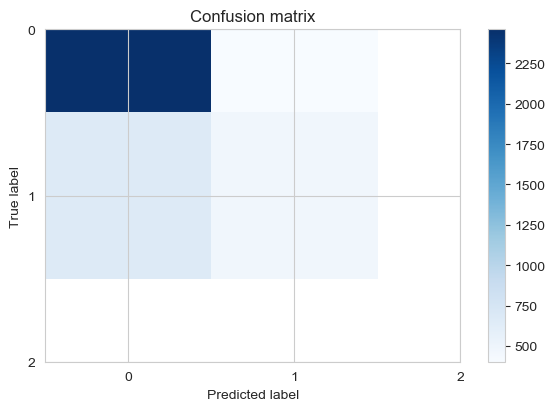

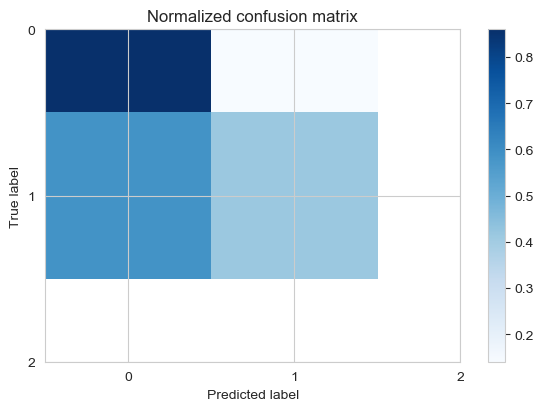

In [60]:
# Import data
classi_data = datasets.load_iris()
x = classi_data.data
y = classi_data.target

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classi_data.target_names))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Hitung confusion matrix
cm = confusion_matrix(y_test, hasil)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalisasi confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

## SVM

In [61]:
from sklearn import svm

In [62]:
classifier2 = svm.SVC(decision_function_shape='ovo')
classifier2.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Evaluasi (Akurasi & Confusion matrix)

In [63]:
# Hasil akurasi dari metode SVM
hasil2 = classifier2.predict(x_test)
print(classification_report(y_test, hasil2))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      2863
           1       0.67      0.35      0.46      1138

    accuracy                           0.77      4001
   macro avg       0.73      0.64      0.66      4001
weighted avg       0.75      0.77      0.74      4001



### Kesimpulan
Dari data di atas, didapatkan bahwa menggunakan metode SVM mendapatkan akurasi 77%

### Confusion Matrix

Confusion matrix without normalization
[[2671  192]
 [ 741  397]]
Normalized confusion matrix
[[0.9329 0.0671]
 [0.6511 0.3489]]


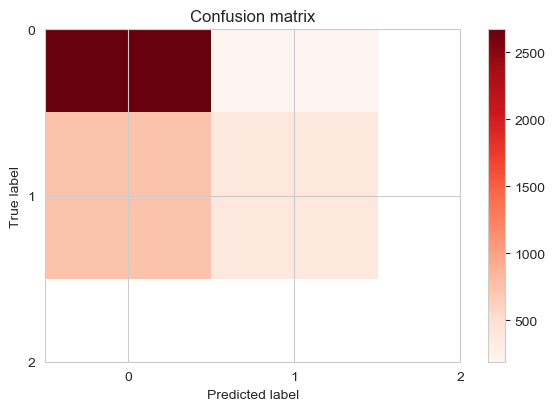

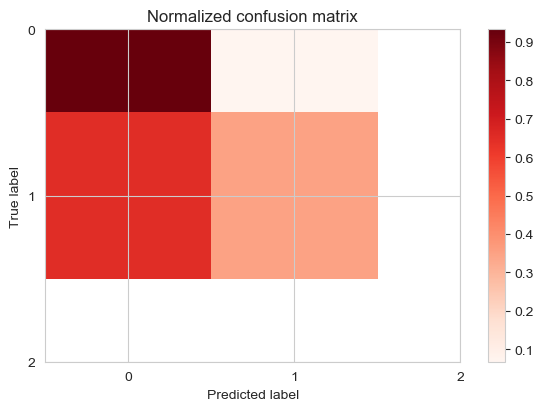

In [64]:
# Import data
classi_data = datasets.load_iris()
x = classi_data.data
y = classi_data.target

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classi_data.target_names))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Hitung confusion matrix
cm = confusion_matrix(y_test, hasil2)
np.set_printoptions(precision=4)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalisasi confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()